<h1><center><font size="6">Classifying Cursive Hiragana (崩し字) KMNIST using CNN</font></center></h1>


<img src="http://su-cultural-history.up.n.seesaa.net/su-cultural-history/image/P1030717.JPG?d=a48" width="400"></img>


# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Data exploration</a>
    - <a href='#41'>Class distribution</a>
    - <a href='#42'>Images samples</a>
- <a href='#5'>Model</a>  
    - <a href='#51'>Prepare the model</a>  
    - <a href='#52'>Train the model</a>  
    - <a href='#53'>Validation accuracy and loss</a>  
    - <a href='#54'>Validation accuracy per class</a>  
- <a href='#6'>Test prediction</a>     
- <a href='#7'>Conclusions</a>
- <a href='#8'>References</a>

# <a id="1">Introduction</a>  


## Dataset

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.   


KMNIST (Kuzushiji-MNIST or Cursive hiragana-MNIST)  was introduced as an alternative to MNIST. It contains images with the first entries from the 10 main Japanese hiragana character groups.



## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.   

The images are storred in numpy arrays of 60,000 x 28 x 28 and 10,000 x 28 x 28, respectively. The labels are also stored in two numpy arrays, one for train and another for the test set.


# <a id="2">Load packages</a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.layers.normalization.batch_normalization import BatchNormalization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 

## Parameters

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.1
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 100
BATCH_SIZE = 128

IS_LOCAL = True

import os

if(IS_LOCAL):
    PATH="./data"
else:
    PATH="../input/"
print(os.listdir(PATH))

['kmnist_classmap.csv', 'test', 'train']


# <a id="3">Read the data</a>

We will read the two data files containing the 10-class data, KMNIST, similar to MNIST.

There are 10 different classes of images, one class for each number between 0 and 9. 

Image dimmensions are **28**x**28**.   

The train set and test set are given in two separate numpy arrays.   

We are also reading the labels for train and test sets.

Aditionally, we will read the character class map for KMNIST, so that we can display the actual characters corresponding to the labels.


In [3]:
train_images = np.load(PATH+'/train/images.npz')['arr_0']
test_images = np.load(PATH+'/test/images.npz')['arr_0']
train_labels = np.load(PATH+'/train/labels.npz')['arr_0']
test_labels = np.load(PATH+'/test/labels.npz')['arr_0']

In [4]:
char_df = pd.read_csv(PATH+'/kmnist_classmap.csv', encoding = 'utf-8')

# <a id="4">Data exploration</a>

![](http://)The dimmension of the original  train,  test set are as following:

In [5]:
print("KMNIST train shape:", train_images.shape)
print("KMNIST test shape:", test_images.shape)
print("KMNIST train shape:", train_labels.shape)
print("KMNIST test shape:", test_labels.shape)

KMNIST train shape: (60000, 28, 28)
KMNIST test shape: (10000, 28, 28)
KMNIST train shape: (60000,)
KMNIST test shape: (10000,)


The dimmension of the character set data file for KMNIST are:

In [6]:
print("KMNIST character map shape:", char_df.shape)

KMNIST character map shape: (10, 3)


Let's show the character map:

In [7]:
char_df

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


## <a id="41">Class distribution</a>

Let's see how many number of images are in each class. 

### Train set images class distribution

In [9]:
print('Percent for each category:',np.bincount(train_labels)/len(train_labels)*100)

Percent for each category: [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


The classes are equaly distributed in the train set (being 10% each, or 6000 items).  Let's also plot a graph for these.

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (10).

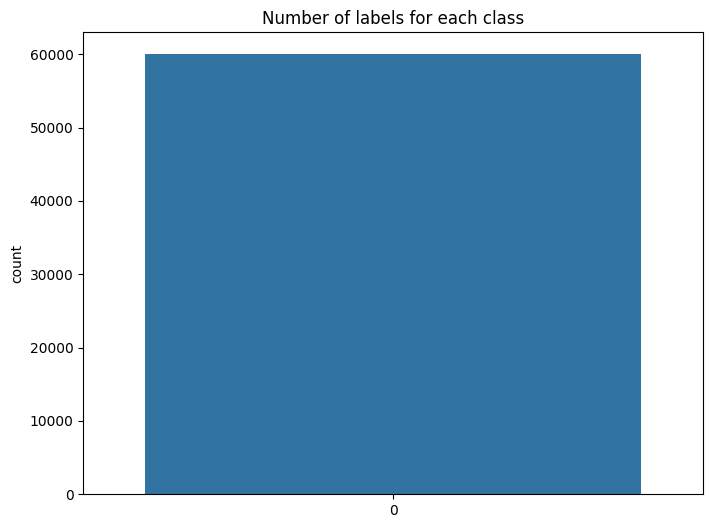

In [10]:
labels = char_df['char']
f, ax = plt.subplots(1,1, figsize=(8,6))
g = sns.countplot(train_labels)
g.set_title("Number of labels for each class")
g.set_xticklabels(labels)
plt.show()    

## <a id="42">Sample images</a>

### Train dataset images

Let's plot some samples for the images.

In [8]:
def plot_sample_images_data(images, labels):
    plt.figure(figsize=(12,12))
    for i in tqdm_notebook(range(10)):
        imgs = images[np.where(labels == i)]
        lbls = labels[np.where(labels == i)]
        for j in range(10):
            plt.subplot(10,10,i*10+j+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(imgs[j], cmap=plt.cm.binary)
            plt.xlabel(lbls[j])

C:\Users\xiang\AppData\Local\Temp\ipykernel_24376\3193316136.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

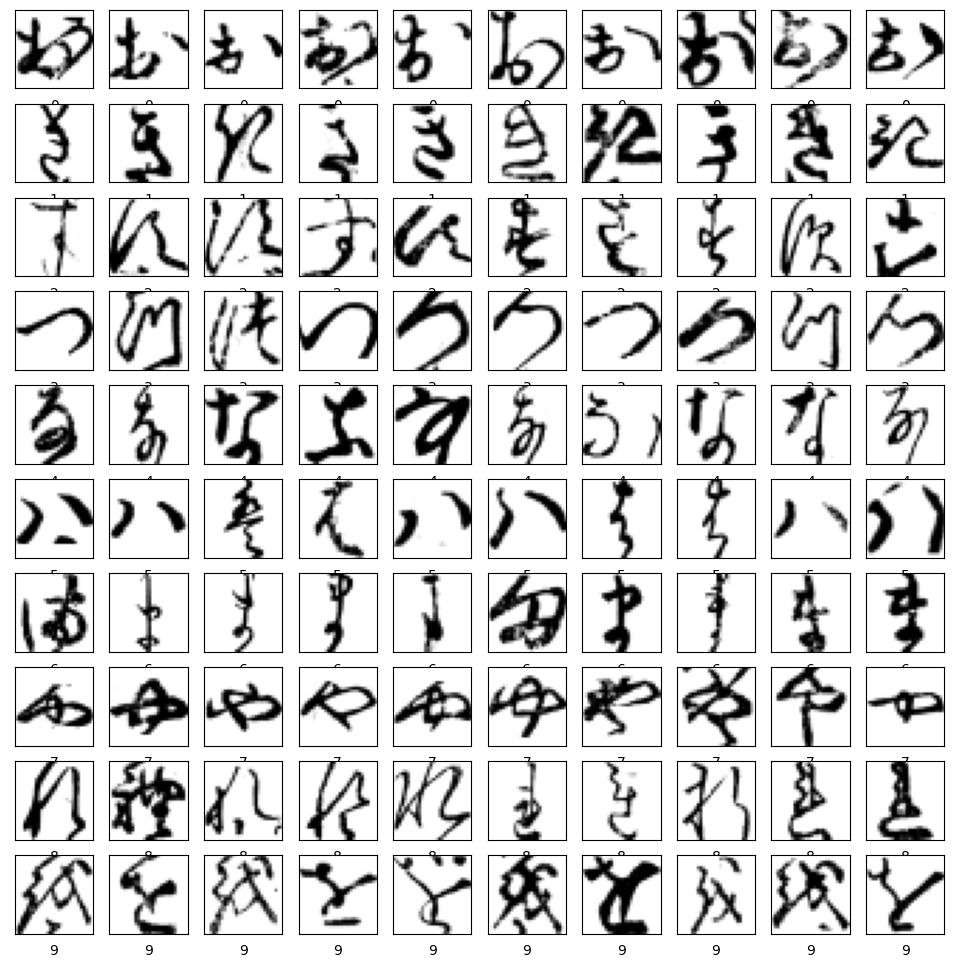

In [13]:
plot_sample_images_data(train_images, train_labels)

### Test set images

Let's plot now a selection of the train set images. We will just randomly select some of the test images. In this dataset, also the test images have labels associated.

C:\Users\xiang\AppData\Local\Temp\ipykernel_24376\3193316136.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

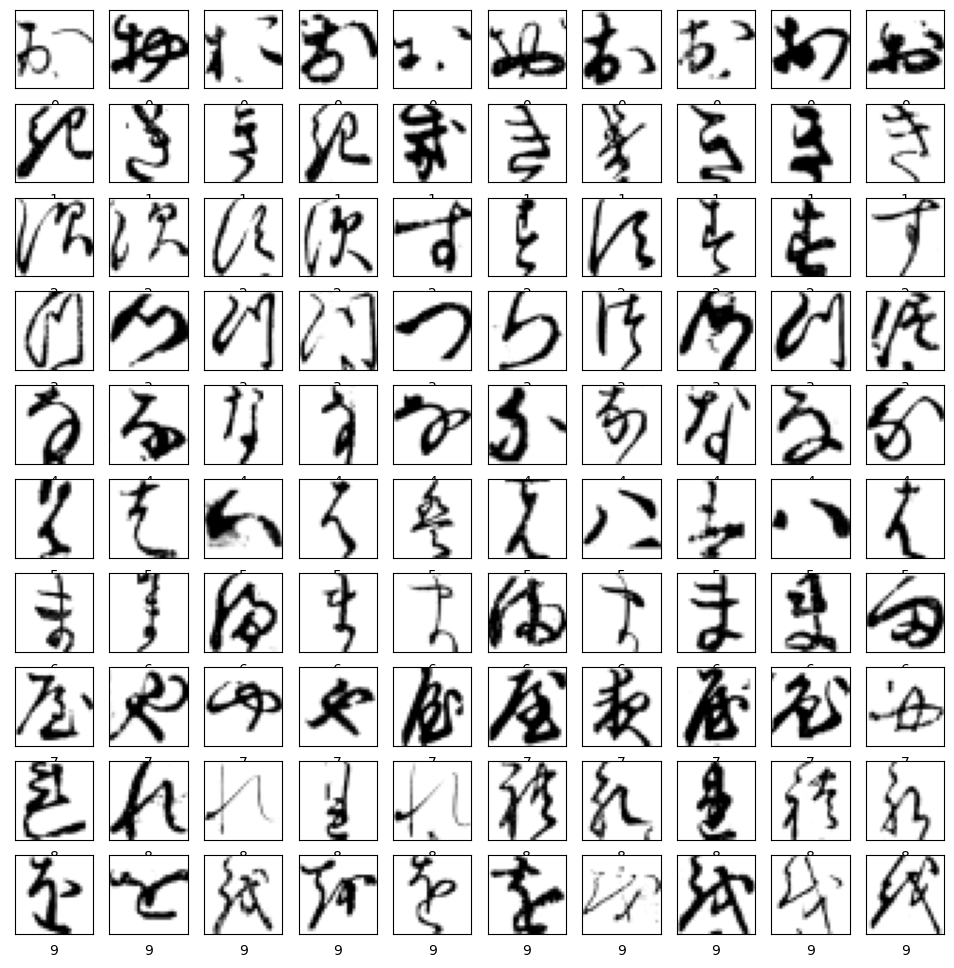

In [14]:
plot_sample_images_data(test_images, test_labels)

# <a id="5">Model</a>

We start with preparing the model.

## <a id="51">Prepare the model</a>

## Data preprocessing

First we will do a data preprocessing to prepare for the model.

We reshape the numpy arrays for images to associate to each image a (28 x 28 x 1) array, with values normalized.

In [9]:
# data preprocessing
from tensorflow.keras.utils import to_categorical
def data_preprocessing(images, labels):
    out_y = tf.keras.utils.to_categorical(labels, NUM_CLASSES)
    num_images = images.shape[0]
    x_shaped_array = images.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [10]:
import tensorflow as tf

We process both the train_data and the test_data.

In [11]:
X, y = data_preprocessing(train_images, train_labels)
X_test, y_test = data_preprocessing(test_images, test_labels)

## Split train in train and validation set

We further split the train set in train and validation set. The validation set will be 10% from the original train set, therefore the split will be train/validation of 0.9/0.1.

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The dimmension of the processed train, validation and test set are as following:

In [13]:
print("KMNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("KMNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("KMNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

KMNIST train -  rows: 54000  columns: (28, 28, 1)
KMNIST valid -  rows: 6000  columns: (28, 28, 1)
KMNIST test -  rows: 10000  columns: (28, 28, 1)


Let's check the class imbalance for the resulted training set.

ValueError: Input data must be a pandas object to reorder

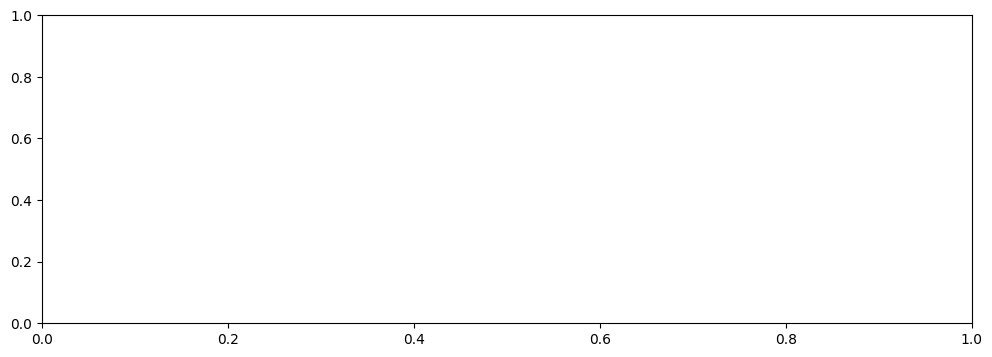

In [15]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(ydf[0], order = np.arange(0,10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")
            
    plt.show()  

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = label_counts.index[i]
        label_char = char_df[char_df['index']==label]['char'].item()
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{}({}):   {} or {}%".format(label, label_char, count, percent))
    
plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

Let's see also the class distribution of validation set.

ValueError: Input data must be a pandas object to reorder

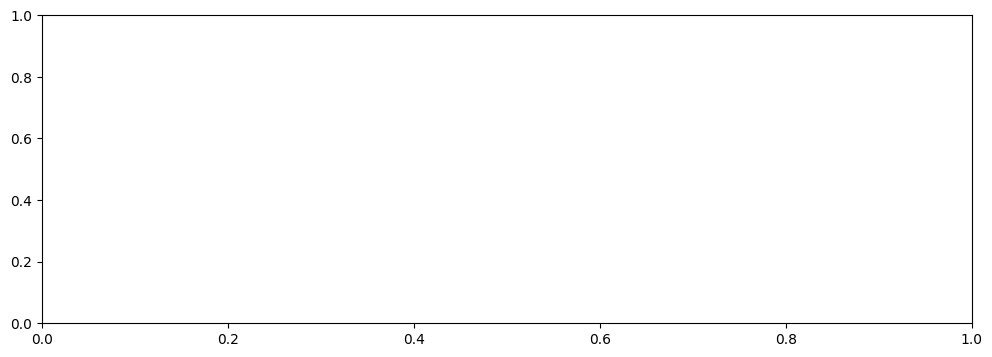

In [16]:
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))

## <a id="52">Train the model</a>

### Build the model   



We will use a **Sequential** model.
* The **Sequential** model is a linear stack of layers. It can be first initialized and then we add layers using **add** method or we can add all layers at init stage. The layers added are as follows:

* **Conv2D** is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:
 * filters - the number of filters (Kernels) used with this layer; here filters = 32;
 * kernel_size - the dimmension of the Kernel: (3 x 3);
 * activation - is the activation function used, in this case `relu`;
 * kernel_initializer - the function used for initializing the kernel;
 * input_shape - is the shape of the image presented to the CNN: in our case is 28 x 28
 The input and output of the **Conv2D** is a 4D tensor.
* **Conv2D** with the following parameters:
 * filters: 32;
 * kernel_size: (3 x 3);
 * activation: `relu`;
* **MaxPooling2D** is a Max pooling operation for spatial data. Parameters used here are:
 * *pool_size*, in this case (2,2), representing the factors by which to downscale in both directions;
 
* **Dropout**. Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting. The parameter used is:
 * *rate*, set here to 0.25. 
 
* **Conv2D** with the following parameters:
 * filters: 64;
 * kernel_size : (3 x 3);
 * activation : `relu`;
 
* **MaxPooling2D** with parameter:
 * *pool_size* : (2,2);

* **Dropout**. with parameter:
 * *rate* : 0.25;
 
* **Conv2D** with the following parameters:
 * filters: 128;
 * kernel_size : (3 x 3);
 * activation : `relu`;

* **Dropout**. with parameter:
 * *rate* : 0.4;
 
* **Flatten**. This layer Flattens the input. Does not affect the batch size. It is used without parameters;

* **Dense**. This layer is a regular fully-connected NN layer. It is used without parameters;
 * units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;
 * activation - activation function : `relu`;

* **Dropout**. with parameter:
 * *rate* : 0.3;
 
* **Dense**. This is the final layer (fully connected). It is used with the parameters:
 * units: the number of classes (in our case 10);
 * activation : `softmax`; for this final layer it is used `softmax` activation (standard for multiclass classification)
 

Then we compile the model, specifying as well the following parameters:
* *loss*;
* *optimizer*;
* *metrics*. 


In [14]:
import tensorflow as tf

In [15]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [16]:
X.shape

(60000, 28, 28, 1)

In [76]:
import json
import time

'Thu Dec 15 00:44:37 2022'

In [116]:
def trainer(X_train, y_train,validation_data, X_test, y_true,
          architect=[],
          batch_size=BATCH_SIZE,
          pochs=NO_EPOCHS,
          verbose=1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]):
    # Model
    model = Sequential()
    # Add convolution 2D
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
            kernel_initializer='he_normal',input_shape=(IMG_ROWS, IMG_COLS, 1)))

    model.add(BatchNormalization())

    model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    for i in architect:
        model.add(Dense(i, activation='relu'))

    model.add(Dense(NUM_CLASSES, activation='softmax'))
    # Compile the model
    model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    output = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=NO_EPOCHS,
          verbose=1,
          callbacks=[callback],
          validation_data=validation_data)
    
    predicted_classes = np.argmax(model.predict(X_test), axis=-1)
    y_true = np.argmax(y_test,axis=1)
    correct = np.nonzero(predicted_classes==y_true)[0]
    test_acc = correct.shape[0]/len(y_true)
    
    results = output.history
    results['architect'] = architect
    results['test_acc'] = test_acc
    with open(f'./experiments/result_{"_".join(map(str, architect))}.json', 'w') as f:
        json.dump(results, f)
    return results
    

### Compile the model
We then compile the model, with the layers and optimized defined.

### Inspect the model

Let's check the model we initialized.

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 6, 6, 32)         

### Run the model

We run the model with the training set. We are also using the validation set (a subset from the orginal training set) for validation.

In [69]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [117]:
trainer(X_train, y_train, (X_val, y_val), X_test, y_true, [8])

Epoch 1/100
422/422 [==============================] - 4s 8ms/step - loss: 0.6246 - accuracy: 0.7892 - val_loss: 0.2813 - val_accuracy: 0.9172
Epoch 2/100
422/422 [==============================] - 3s 7ms/step - loss: 0.1474 - accuracy: 0.9569 - val_loss: 0.1530 - val_accuracy: 0.9567
Epoch 3/100
422/422 [==============================] - 3s 7ms/step - loss: 0.0926 - accuracy: 0.9725 - val_loss: 0.1233 - val_accuracy: 0.9675
Epoch 4/100
422/422 [==============================] - 3s 7ms/step - loss: 0.0696 - accuracy: 0.9787 - val_loss: 0.1175 - val_accuracy: 0.9655
Epoch 5/100
422/422 [==============================] - 3s 8ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.1112 - val_accuracy: 0.9695
Epoch 6/100
422/422 [==============================] - 3s 8ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.1199 - val_accuracy: 0.9680
Epoch 7/100
422/422 [==============================] - 3s 7ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.1336 - val_accuracy: 0.9678

{'loss': [0.6245959401130676,
  0.14744137227535248,
  0.09258651733398438,
  0.06961453706026077,
  0.05244753137230873,
  0.04134996235370636,
  0.036317940801382065,
  0.029107719659805298,
  0.028854578733444214,
  0.02546580135822296,
  0.020190667361021042,
  0.018016420304775238,
  0.019812097772955894,
  0.0199002455919981,
  0.011730436235666275,
  0.014695419929921627,
  0.012642952613532543,
  0.013354039750993252],
 'accuracy': [0.7892407178878784,
  0.9568703770637512,
  0.9724629521369934,
  0.9787222146987915,
  0.9838518500328064,
  0.9866851568222046,
  0.9883333444595337,
  0.990574061870575,
  0.9910740852355957,
  0.991518497467041,
  0.9935370087623596,
  0.9943147897720337,
  0.9933518767356873,
  0.9937962889671326,
  0.9963889122009277,
  0.9953518509864807,
  0.9956111311912537,
  0.9953518509864807],
 'val_loss': [0.281265527009964,
  0.15304024517536163,
  0.12332938611507416,
  0.11751136928796768,
  0.11123008280992508,
  0.11994758248329163,
  0.1336372345

In [118]:
trainer(X_train, y_train, (X_val, y_val), X_test, y_true, [16])

Epoch 1/100
422/422 [==============================] - 5s 12ms/step - loss: 0.5400 - accuracy: 0.8243 - val_loss: 0.2340 - val_accuracy: 0.9282
Epoch 2/100
422/422 [==============================] - 5s 11ms/step - loss: 0.1339 - accuracy: 0.9590 - val_loss: 0.1568 - val_accuracy: 0.9502
Epoch 3/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0843 - accuracy: 0.9735 - val_loss: 0.1110 - val_accuracy: 0.9672
Epoch 4/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.0994 - val_accuracy: 0.9712
Epoch 5/100
422/422 [==============================] - 5s 11ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.1242 - val_accuracy: 0.9637
Epoch 6/100
422/422 [==============================] - 3s 8ms/step - loss: 0.0386 - accuracy: 0.9873 - val_loss: 0.1172 - val_accuracy: 0.9668
Epoch 7/100
422/422 [==============================] - 3s 8ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.1047 - val_accuracy: 0

{'loss': [0.5400084853172302,
  0.13394689559936523,
  0.08433827757835388,
  0.057902175933122635,
  0.045449163764715195,
  0.038604721426963806,
  0.03444253280758858,
  0.026353588327765465,
  0.019491495564579964,
  0.022045930847525597,
  0.020877841860055923,
  0.01942591927945614,
  0.014889415353536606,
  0.01593424193561077,
  0.016516398638486862,
  0.013206388801336288,
  0.01303347758948803,
  0.013119390234351158,
  0.009908578358590603,
  0.011444184929132462,
  0.011330245062708855,
  0.011195125058293343],
 'accuracy': [0.8242777585983276,
  0.9589999914169312,
  0.9735000133514404,
  0.9818518757820129,
  0.9852407574653625,
  0.9872592687606812,
  0.9888333082199097,
  0.9912777543067932,
  0.9937037229537964,
  0.9924629926681519,
  0.992888867855072,
  0.9935185313224792,
  0.9951851963996887,
  0.9945370554924011,
  0.994351863861084,
  0.9953888654708862,
  0.9954259395599365,
  0.9953518509864807,
  0.9964259266853333,
  0.9962407350540161,
  0.996222198009491,


In [120]:
trainer(X_train, y_train, (X_val, y_val), X_test, y_true, [32])

Epoch 1/100
422/422 [==============================] - 6s 12ms/step - loss: 0.4535 - accuracy: 0.8576 - val_loss: 0.2045 - val_accuracy: 0.9380
Epoch 2/100
422/422 [==============================] - 4s 11ms/step - loss: 0.1154 - accuracy: 0.9654 - val_loss: 0.1090 - val_accuracy: 0.9662
Epoch 3/100
422/422 [==============================] - 7s 16ms/step - loss: 0.0755 - accuracy: 0.9760 - val_loss: 0.1065 - val_accuracy: 0.9680
Epoch 4/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0561 - accuracy: 0.9829 - val_loss: 0.0913 - val_accuracy: 0.9728
Epoch 5/100
422/422 [==============================] - 5s 12ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0899 - val_accuracy: 0.9750
Epoch 6/100
422/422 [==============================] - 3s 8ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0923 - val_accuracy: 0.9755
Epoch 7/100
422/422 [==============================] - 5s 11ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.1033 - val_accuracy: 

{'loss': [0.45352259278297424,
  0.11539984494447708,
  0.07548660784959793,
  0.05608580633997917,
  0.04249078780412674,
  0.03505773842334747,
  0.03171307221055031,
  0.024334365501999855,
  0.024566389620304108,
  0.019525719806551933,
  0.018291110172867775,
  0.018593356013298035,
  0.014616603031754494,
  0.01545465737581253,
  0.013074579648673534,
  0.012813838198781013,
  0.013179427944123745,
  0.01154955755919218,
  0.010781212709844112,
  0.01192107517272234,
  0.010673549957573414,
  0.012808132916688919,
  0.0066995639353990555,
  0.006496069487184286,
  0.012235602363944054,
  0.006606571841984987,
  0.010005288757383823],
 'accuracy': [0.8575925827026367,
  0.9653518795967102,
  0.9759629368782043,
  0.9828518629074097,
  0.9871296286582947,
  0.9888888597488403,
  0.9897962808609009,
  0.9919629693031311,
  0.9918888807296753,
  0.9934444427490234,
  0.994092583656311,
  0.9936851859092712,
  0.9949444532394409,
  0.9949444532394409,
  0.9954814910888672,
  0.9956296

In [121]:
trainer(X_train, y_train, (X_val, y_val), X_test, y_true, [64])

Epoch 1/100
422/422 [==============================] - 4s 8ms/step - loss: 0.4383 - accuracy: 0.8611 - val_loss: 0.1876 - val_accuracy: 0.9413
Epoch 2/100
422/422 [==============================] - 4s 9ms/step - loss: 0.1160 - accuracy: 0.9639 - val_loss: 0.1295 - val_accuracy: 0.9603
Epoch 3/100
422/422 [==============================] - 4s 9ms/step - loss: 0.0751 - accuracy: 0.9770 - val_loss: 0.1214 - val_accuracy: 0.9673
Epoch 4/100
422/422 [==============================] - 4s 9ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0965 - val_accuracy: 0.9723
Epoch 5/100
422/422 [==============================] - 4s 9ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.1147 - val_accuracy: 0.9673
Epoch 6/100
422/422 [==============================] - 4s 9ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0942 - val_accuracy: 0.9718
Epoch 7/100
422/422 [==============================] - 4s 9ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0947 - val_accuracy: 0.9738

{'loss': [0.4383370578289032,
  0.11601398885250092,
  0.07507581263780594,
  0.05590900033712387,
  0.0463414303958416,
  0.038967713713645935,
  0.032077137380838394,
  0.0246350709348917,
  0.026709994301199913,
  0.02123989537358284,
  0.020837843418121338,
  0.018595058470964432,
  0.018630212172865868,
  0.015394310466945171,
  0.012125225737690926,
  0.013792194426059723,
  0.016801083460450172,
  0.009530737064778805,
  0.011602803133428097,
  0.012732337228953838,
  0.008893092162907124,
  0.009139138273894787,
  0.009079841896891594,
  0.011935948394238949],
 'accuracy': [0.8610740900039673,
  0.9638888835906982,
  0.9769629836082458,
  0.9824814796447754,
  0.9857407212257385,
  0.9875555634498596,
  0.9896666407585144,
  0.991944432258606,
  0.9911666512489319,
  0.9933333396911621,
  0.9930925965309143,
  0.9935185313224792,
  0.9939629435539246,
  0.9948333501815796,
  0.9956851601600647,
  0.9953518509864807,
  0.9944259524345398,
  0.9968888759613037,
  0.99625927209854

In [122]:
trainer(X_train, y_train, (X_val, y_val), X_test, y_true, [8,8])

Epoch 1/100
422/422 [==============================] - 6s 13ms/step - loss: 0.6997 - accuracy: 0.7637 - val_loss: 0.3938 - val_accuracy: 0.8833
Epoch 2/100
422/422 [==============================] - 4s 10ms/step - loss: 0.1656 - accuracy: 0.9512 - val_loss: 0.1507 - val_accuracy: 0.9565
Epoch 3/100
422/422 [==============================] - 4s 9ms/step - loss: 0.1055 - accuracy: 0.9691 - val_loss: 0.1298 - val_accuracy: 0.9643
Epoch 4/100
422/422 [==============================] - 4s 9ms/step - loss: 0.0764 - accuracy: 0.9761 - val_loss: 0.1387 - val_accuracy: 0.9627
Epoch 5/100
422/422 [==============================] - 4s 9ms/step - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.1050 - val_accuracy: 0.9727
Epoch 6/100
422/422 [==============================] - 4s 9ms/step - loss: 0.0459 - accuracy: 0.9853 - val_loss: 0.1203 - val_accuracy: 0.9677
Epoch 7/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.1287 - val_accuracy: 0.9

{'loss': [0.6997299194335938,
  0.16562803089618683,
  0.10550187528133392,
  0.07637999206781387,
  0.05900370329618454,
  0.04588586837053299,
  0.04226323962211609,
  0.033899545669555664,
  0.0303523950278759,
  0.022978052496910095,
  0.025599826127290726,
  0.022391047328710556,
  0.020552784204483032,
  0.017847316339612007,
  0.01877240091562271,
  0.01706008054316044,
  0.014184610918164253,
  0.014881616458296776,
  0.012622027657926083,
  0.014417084865272045,
  0.014219391159713268,
  0.012540037743747234,
  0.01010076142847538,
  0.011454368010163307,
  0.010666817426681519,
  0.010180153883993626],
 'accuracy': [0.7637407183647156,
  0.9511851668357849,
  0.9690555334091187,
  0.976111114025116,
  0.9819999933242798,
  0.9853333234786987,
  0.9863703846931458,
  0.9895740747451782,
  0.9900555610656738,
  0.9926111102104187,
  0.9912592768669128,
  0.9927777647972107,
  0.9935370087623596,
  0.9942777752876282,
  0.9939629435539246,
  0.9941296577453613,
  0.9953333139419

In [123]:
trainer(X_train, y_train, (X_val, y_val), X_test, y_true, [16,16])

Epoch 1/100
422/422 [==============================] - 8s 17ms/step - loss: 0.5423 - accuracy: 0.8240 - val_loss: 0.2334 - val_accuracy: 0.9277
Epoch 2/100
422/422 [==============================] - 7s 17ms/step - loss: 0.1329 - accuracy: 0.9599 - val_loss: 0.1179 - val_accuracy: 0.9655
Epoch 3/100
422/422 [==============================] - 7s 17ms/step - loss: 0.0852 - accuracy: 0.9743 - val_loss: 0.0959 - val_accuracy: 0.9723
Epoch 4/100
422/422 [==============================] - 7s 16ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.1212 - val_accuracy: 0.9635
Epoch 5/100
422/422 [==============================] - 7s 16ms/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.1116 - val_accuracy: 0.9685
Epoch 6/100
422/422 [==============================] - 7s 17ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0939 - val_accuracy: 0.9737
Epoch 7/100
422/422 [==============================] - 7s 17ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.1044 - val_accuracy:

{'loss': [0.542289674282074,
  0.13292624056339264,
  0.08517029881477356,
  0.06062658876180649,
  0.050990596413612366,
  0.04173433035612106,
  0.03338772803544998,
  0.028923263773322105,
  0.026339102536439896,
  0.022788746282458305,
  0.022589243948459625,
  0.0171329565346241,
  0.01827252469956875,
  0.016966629773378372,
  0.0160099845379591,
  0.013954413123428822,
  0.013487224467098713,
  0.0117980120703578,
  0.01482334639877081,
  0.01351224910467863,
  0.009316547773778439,
  0.00911465659737587,
  0.009182329289615154,
  0.01146850548684597,
  0.010719369165599346],
 'accuracy': [0.8239629864692688,
  0.9598888754844666,
  0.9742777943611145,
  0.9813888669013977,
  0.9842777848243713,
  0.9869629740715027,
  0.9895185232162476,
  0.9902963042259216,
  0.9916296005249023,
  0.9922407269477844,
  0.9926851987838745,
  0.9942407608032227,
  0.9940184950828552,
  0.9943147897720337,
  0.9948148131370544,
  0.9955185055732727,
  0.9954444169998169,
  0.9963703751564026,
  

In [124]:
trainer(X_train, y_train, (X_val, y_val), X_test, y_true, [64,64])

Epoch 1/100
422/422 [==============================] - 4s 9ms/step - loss: 0.4697 - accuracy: 0.8457 - val_loss: 0.2490 - val_accuracy: 0.9167
Epoch 2/100
422/422 [==============================] - 4s 10ms/step - loss: 0.1244 - accuracy: 0.9618 - val_loss: 0.1377 - val_accuracy: 0.9567
Epoch 3/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.1049 - val_accuracy: 0.9673
Epoch 4/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.1058 - val_accuracy: 0.9662
Epoch 5/100
422/422 [==============================] - 4s 9ms/step - loss: 0.0491 - accuracy: 0.9842 - val_loss: 0.0909 - val_accuracy: 0.9730
Epoch 6/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0411 - accuracy: 0.9868 - val_loss: 0.1099 - val_accuracy: 0.9690
Epoch 7/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0984 - val_accuracy: 0

{'loss': [0.469669908285141,
  0.12436624616384506,
  0.08060472458600998,
  0.058718062937259674,
  0.0491124764084816,
  0.041068535298109055,
  0.032291002571582794,
  0.030895162373781204,
  0.025402138009667397,
  0.022022845223546028,
  0.02170800045132637,
  0.019333159551024437,
  0.01889028772711754,
  0.01657485030591488,
  0.015801262110471725,
  0.01600778102874756,
  0.014378422871232033,
  0.013425799086689949,
  0.013391748070716858,
  0.012927391566336155,
  0.012591901235282421,
  0.012421592138707638,
  0.011170935817062855,
  0.009466073475778103,
  0.010503482073545456,
  0.010536023415625095,
  0.00971059501171112],
 'accuracy': [0.8457221984863281,
  0.9617592692375183,
  0.9756296277046204,
  0.9819074273109436,
  0.9841851592063904,
  0.9868147969245911,
  0.9898889064788818,
  0.9902036786079407,
  0.9918518662452698,
  0.9932777881622314,
  0.9927407503128052,
  0.9937222003936768,
  0.9935926198959351,
  0.9947037100791931,
  0.9951666593551636,
  0.994611084

In [125]:
trainer(X_train, y_train, (X_val, y_val), X_test, y_true, [128,128])

Epoch 1/100
422/422 [==============================] - 4s 9ms/step - loss: 0.4326 - accuracy: 0.8601 - val_loss: 0.1877 - val_accuracy: 0.9423
Epoch 2/100
422/422 [==============================] - 4s 9ms/step - loss: 0.1249 - accuracy: 0.9609 - val_loss: 0.1145 - val_accuracy: 0.9648
Epoch 3/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0829 - accuracy: 0.9744 - val_loss: 0.1292 - val_accuracy: 0.9613
Epoch 4/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0641 - accuracy: 0.9802 - val_loss: 0.0970 - val_accuracy: 0.9720
Epoch 5/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0512 - accuracy: 0.9836 - val_loss: 0.1074 - val_accuracy: 0.9705
Epoch 6/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0416 - accuracy: 0.9863 - val_loss: 0.0990 - val_accuracy: 0.9732
Epoch 7/100
422/422 [==============================] - 4s 10ms/step - loss: 0.0376 - accuracy: 0.9874 - val_loss: 0.1064 - val_accuracy: 0

{'loss': [0.43263959884643555,
  0.12487556040287018,
  0.08288450539112091,
  0.06405916064977646,
  0.051236312836408615,
  0.041553009301424026,
  0.03761955723166466,
  0.03345220163464546,
  0.026847608387470245,
  0.027999814599752426,
  0.02230033650994301,
  0.019538547843694687,
  0.019970208406448364,
  0.020966166630387306,
  0.017177117988467216,
  0.01835412159562111,
  0.017818117514252663,
  0.015736347064375877,
  0.01108336541801691,
  0.016861116513609886,
  0.012773126363754272,
  0.011764002963900566],
 'accuracy': [0.8600741028785706,
  0.9608703851699829,
  0.9743703603744507,
  0.9802407622337341,
  0.9836481213569641,
  0.9863333106040955,
  0.9874444603919983,
  0.9895740747451782,
  0.9910555481910706,
  0.9904814958572388,
  0.9925000071525574,
  0.9936296343803406,
  0.9932222366333008,
  0.9934259057044983,
  0.9943703413009644,
  0.993925929069519,
  0.9945740699768066,
  0.9950740933418274,
  0.9965555667877197,
  0.9942777752876282,
  0.9959999918937683,

In [70]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [71]:
conv_8 = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=NO_EPOCHS,
          verbose=1,
          callbacks=[callback],
          validation_data=(X_val, y_val))

Epoch 1/100
374/422 [=========================>....] - ETA: 0s - loss: 0.0097 - accuracy: 0.9969

KeyboardInterrupt: 

In [59]:
history.history

{'loss': [0.017430877313017845,
  0.020094728097319603,
  0.01705852523446083,
  0.014649353921413422,
  0.015002239495515823,
  0.016522837802767754,
  0.01017096359282732,
  0.008739070035517216,
  0.012400798499584198,
  0.012305841781198978,
  0.011043504811823368],
 'accuracy': [0.9942407608032227,
  0.9929999709129333,
  0.9940740466117859,
  0.9951296448707581,
  0.9950185418128967,
  0.9947592616081238,
  0.996833324432373,
  0.9971851706504822,
  0.995888888835907,
  0.9959629774093628,
  0.9959999918937683],
 'val_loss': [0.11365748196840286,
  0.13213694095611572,
  0.11144983768463135,
  0.10987686365842819,
  0.120619036257267,
  0.10325474292039871,
  0.10546376556158066,
  0.13078010082244873,
  0.14647839963436127,
  0.1160033643245697,
  0.11598823219537735],
 'val_accuracy': [0.9726666808128357,
  0.9698333144187927,
  0.9738333225250244,
  0.9768333435058594,
  0.9733333587646484,
  0.9754999876022339,
  0.9768333435058594,
  0.9729999899864197,
  0.9710000157356262,


## <a id="53">Validation accuracy and  loss </a>


We plot accuracy for validation set compared with the accuracy of training set, for each epoch, on the same graph. Then, we plot loss for validation set compared with the loss for training set. 


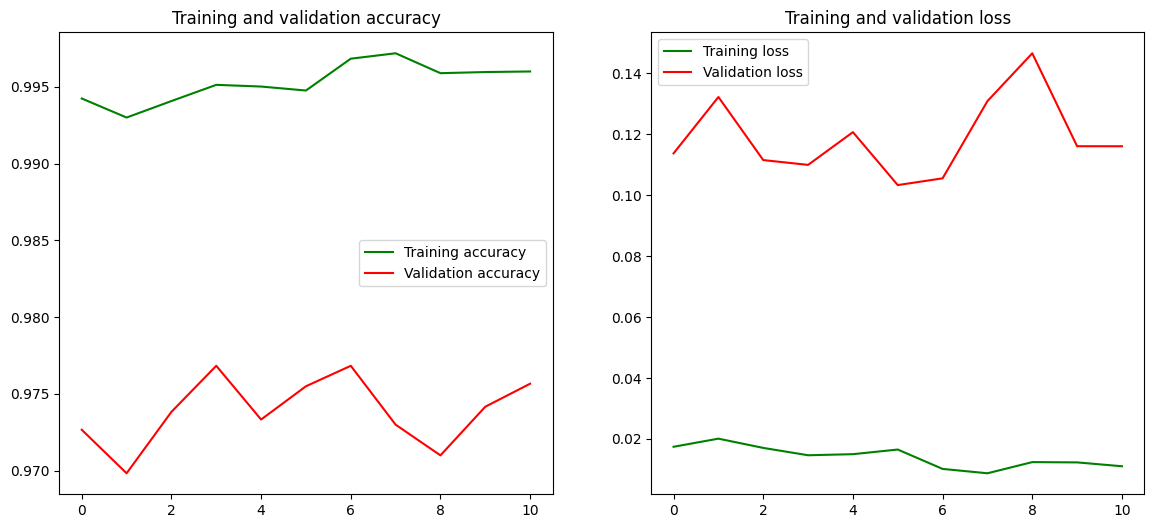

In [60]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)

We can observe that the training is not overfitting, validation accuracy is not decreasing after a certain number of epochs. We obtained final accuracy around 0.987. As well, the validation loss is not increasing after a certain number of epochs, as would have been expected in the case of overfitting. We achieved this by using the 3 Dropout layers inserted in our model. There are other strategies as well, for example by using a variable learning rate or data augmentation images. For the sake of simplicity and in order to keep the calculation very fast (the Kernel complete the training for 50 epochs in less than 10 min), we did not included these techniques for now.

## <a id="54">Validation accuracy / class</a>

Let's see in detail how well are the validation set classes predicted.

In [104]:
#get the predictions for the test data
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

y_true = np.argmax(y_test,axis=1)

In [105]:
y_true

array([2, 9, 3, ..., 9, 4, 2], dtype=int64)

In [106]:
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [110]:
correct.shape[0]/len(y_true)

0.9391

In [107]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9391
Incorrect predicted classes: 609


In [108]:
target_names = ["Class {} ({}):".format(i, char_df[char_df['index']==i]['char'].item()) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

Class 0 (お):       0.93      0.96      0.94      1000
Class 1 (き):       0.95      0.94      0.95      1000
Class 2 (す):       0.93      0.92      0.92      1000
Class 3 (つ):       0.93      0.98      0.95      1000
Class 4 (な):       0.94      0.90      0.92      1000
Class 5 (は):       0.96      0.92      0.94      1000
Class 6 (ま):       0.92      0.95      0.93      1000
Class 7 (や):       0.95      0.93      0.94      1000
Class 8 (れ):       0.95      0.95      0.95      1000
Class 9 (を):       0.93      0.95      0.94      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Validation accuracy is above 0.99 for most of the classes. Only two classes have lower accuracy, above 0.98. 

Let's visualize few images from the validation set that were correctly classified (25 images).

In [ ]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,5, figsize=(12,12))

    for i, indx in enumerate(data_index[:25]):
        ax[i//5, i%5].imshow(X_val[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("True:{}  Pred:{}".format(y_true[indx],predicted_classes[indx]))
    plt.show()    

plot_images(correct, "Greens")

Let's visualize the images from the validation set that were incorrecly classified (25 images).

In [ ]:
plot_images(incorrect, "Reds")

We identify the predicted class for each image by selecting the column with the highest predicted value.

# <a id="6">Test prediction</a>

Let's use the trained model to predict the labels for the test images.

In [56]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)
#get the indices to be plotted
y_true = np.argmax(y_test,axis=1)
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])
target_names = ["Class {} ({}):".format(i, char_df[char_df['index']==i]['char'].item()) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

C:\Users\xiang\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Correct predicted classes: 9374
Incorrect predicted classes: 626
              precision    recall  f1-score   support

Class 0 (お):       0.97      0.94      0.95      1000
Class 1 (き):       0.97      0.91      0.94      1000
Class 2 (す):       0.93      0.91      0.92      1000
Class 3 (つ):       0.94      0.97      0.95      1000
Class 4 (な):       0.90      0.93      0.92      1000
Class 5 (は):       0.93      0.94      0.93      1000
Class 6 (ま):       0.91      0.95      0.93      1000
Class 7 (や):       0.97      0.92      0.94      1000
Class 8 (れ):       0.91      0.98      0.94      1000
Class 9 (を):       0.95      0.93      0.94      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000




Weighted averages for **precision**, **recall** and **f1-score** for the test are 0.96.

Accuracy obtained is **0.955**.

Let's visualize few of the images from the test set that were correctly classified (25 images).

In [57]:
plot_images(correct, "Greens")

NameError: name 'plot_images' is not defined

Let's visualize the images from the test set that were incorrecly classified (25 images).

In [58]:
plot_images(incorrect, "Reds")

NameError: name 'plot_images' is not defined

# <a id="7">Conclusions</a>

With a complex sequential model with multiple convolution layers and **100** epochs for the training, we obtained a precision  of approximatelly **0.99**  for the validation set and approximatelly  **0.96** for the **test**.


 <a id="8">References</a>

[1] Yan LeCun, MNIST Database, http://yann.lecun.com/exdb/mnist/  
[2] DanB, CollinMoris, Deep Learning From Scratch, https://www.kaggle.com/dansbecker/deep-learning-from-scratch  
[3] DanB, Dropout and Strides for Larger Models, https://www.kaggle.com/dansbecker/dropout-and-strides-for-larger-models  
[4] BGO, CNN with Keras, https://www.kaggle.com/bugraokcu/cnn-with-keras    
[5] Gabriel Preda, Simple introduction to CNN for MNIST (99.37%), https://www.kaggle.com/gpreda/simple-introduction-to-cnn-for-mnist-99-37  
[6] Anokas, KMNIST-MNIST replacement, https://www.kaggle.com/aakashnain/kmnist-mnist-replacement    
[7] Megan Risdal, Starter: Kuzushiji-MNIST, https://www.kaggle.com/mrisdal/starter-kuzushiji-mnist-ed86cfac-1   
[8] Kuzushiji-MNIST, project Github repo, https://github.com/rois-codh/kmnist   
[9] Tarin Clanuwat, Mikel Bober-Irizar, Asanobu Kitamoto, Alex Lamb, Kazuaki Yamamoto, David Ha, Deep Learning for Classical Japanese Literature, https://arxiv.org/abs/1812.01718  

